# Earthquakes

In [1]:
# include import statements here
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
from pathlib import Path
import regex as re
from datetime import datetime

import os
import plotly

from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path

import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

import geocoder
from geopy import *
from geopy.geocoders import Nominatim

In [2]:
earthquakes = pd.read_csv('/work/earthquakes/USGS_earthquakes_data.csv')
earthquakes

,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,NST,Azimuthal Gap,DistMin,RMS,...,Updated,Place,Type,Horizontal Error,Depth Error,Magnitude Error,Magnitude Nst,Status,Location Source,Magnitude Source
0,2023-03-20T16:09:39.810Z,37.286333,-121.656667,6.45,2.97,md,124.0,31.0,0.03029,0.09,...,2023-03-21T06:53:37.432Z,"16km E of Seven Trees, CA",earthquake,0.08,0.19,0.146,175.0,reviewed,nc,nc
1,2023-03-20T07:28:45.790Z,34.844833,-116.330833,4.04,2.59,ml,24.0,72.0,0.01577,0.15,...,2023-03-21T07:33:36.862Z,"21km NW of Ludlow, CA",earthquake,0.20,0.35,0.176,25.0,reviewed,ci,ci
2,2023-03-19T11:19:50.860Z,38.519165,-119.492996,5.36,2.82,md,23.0,134.0,0.17480,0.18,...,2023-03-20T16:11:54.434Z,"1km WNW of Walker, CA",earthquake,0.53,2.59,0.280,15.0,automatic,nc,nc
3,2023-03-19T09:53:33.190Z,35.517500,-118.390500,6.66,2.72,ml,56.0,22.0,0.16020,0.15,...,2023-03-20T18:14:55.860Z,"12km SE of Bodfish, CA",earthquake,0.12,0.61,0.258,25.0,reviewed,ci,ci
4,2023-03-18T21:23:56.290Z,40.482833,-124.820333,19.76,2.56,md,42.0,236.0,0.36840,0.16,...,2023-03-20T23:53:17.577Z,"48km WSW of Ferndale, CA",earthquake,0.92,1.07,0.365,33.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111268,1932-01-10T10:44:54.530Z,33.856833,-117.537000,6.00,3.05,mh,3.0,256.0,0.19140,0.26,...,2016-01-27T18:37:57.200Z,"3km SSW of Home Gardens, CA",earthquake,2.05,31.61,0.142,2.0,reviewed,ci,ci
111269,1932-01-07T14:55:43.920Z,32.000000,-116.000000,6.00,3.00,mh,3.0,350.0,2.30000,7.27,...,2016-04-01T20:53:33.719Z,"60km ENE of Ensenada, B.C., MX",earthquake,99.00,31.61,NaN,0.0,reviewed,ci,ci
111270,1932-01-05T13:59:04.000Z,40.420000,-124.420000,NaN,4.50,ml,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"21 km SW of Ferndale, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,brk
111271,1932-01-03T17:58:10.010Z,32.000000,-116.000000,6.00,3.00,mh,2.0,357.0,2.30000,5.49,...,2016-04-02T06:34:34.715Z,"60km ENE of Ensenada, B.C., MX",earthquake,99.00,31.61,NaN,0.0,reviewed,ci,ci


Documentation: 

NST: number of seismic stations which reported P- and S-arrival times for this earthquake.
Azimuthal Gap: the maximum angle separating two adjacent seismic stations, both measured from the epicenter of an earthquake.

DistMin: Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

RMS: The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. The value is dependent on the accuracy of the velocity model used to compute the earthquake location, the quality weights assigned to the arrival time data, and the procedure used to locate the earthquake.

Source_ID: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

<AxesSubplot: xlabel='Depth', ylabel='RMS'>

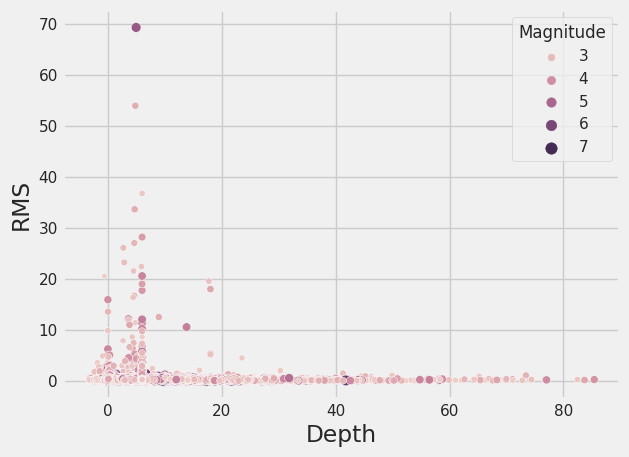

In [3]:
sns.scatterplot(data=earthquakes, x="Depth", y="RMS", hue= "Magnitude", size="Magnitude")


<AxesSubplot: xlabel='Magnitude', ylabel='RMS'>

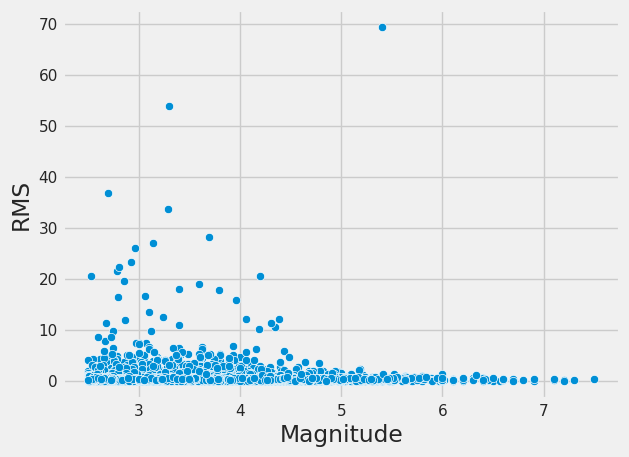

In [4]:
sns.scatterplot(data=earthquakes, x="Magnitude", y="RMS")

We see that the RMS is usually very small, so the predictions for when the earthquakes are going to hit are pretty good. The predictions are worse for smaller earthquakes, but that is prefered rather than the predictions being worse for larger earhtquakes.

<AxesSubplot: xlabel='Magnitude', ylabel='Magnitude Error'>

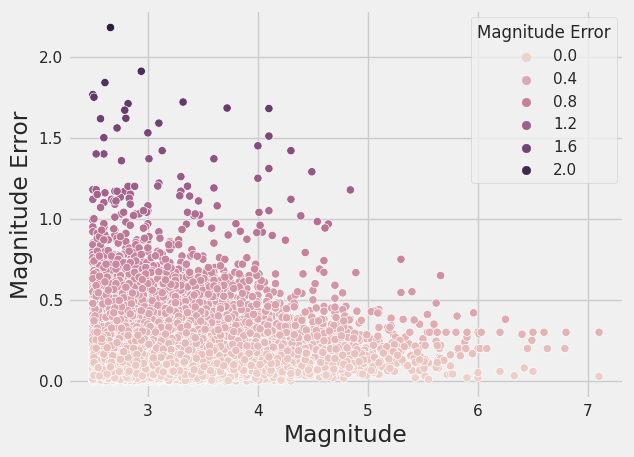

In [5]:
sns.scatterplot(data=earthquakes, x="Magnitude", y="Magnitude Error", hue= "Magnitude Error")

Similarly, we see that Earthquake predictions are more accurate generally when the Magnitude of the earthqake that happens is larger. While this is definately preferable, it will also be important for scientists to be able to predict smaller earthquakes, that while not causing as much damage, can still have impactful effects.

<AxesSubplot: xlabel='Depth', ylabel='Magnitude'>

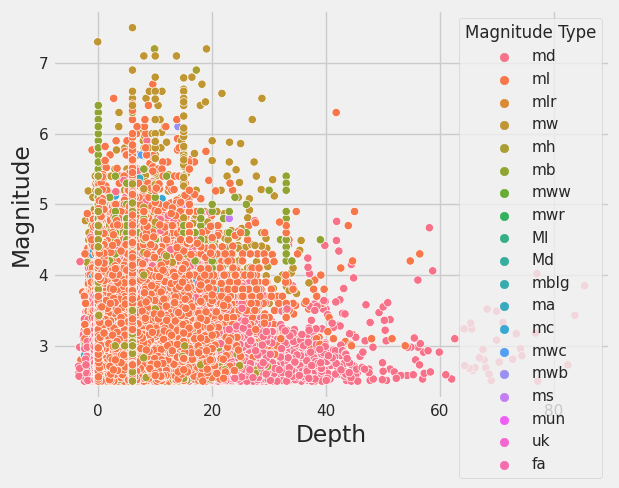

In [6]:
sns.scatterplot(data=earthquakes, x="Depth", y="Magnitude", hue= "Magnitude Type")


In [7]:
earthquakes.shape

(111273, 22)

In [8]:
earthquakes.isna().sum()

Time                    0
Latitude                0
Longitude               0
Depth                 322
Magnitude               0
Magnitude Type          1
NST                  2796
Azimuthal Gap        2782
DistMin             28429
RMS                  2296
Source_ID               0
ID                      0
Updated                 0
Place                  11
Type                    0
Horizontal Error    32573
Depth Error         11536
Magnitude Error     38804
Magnitude Nst        3302
Status                  0
Location Source         0
Magnitude Source        0
dtype: int64

In [9]:
no_nulls_cols = earthquakes.drop(['DistMin', 'Horizontal Error', 'Depth Error', 'Magnitude Error', 'Magnitude Nst'], axis=1)
no_nulls = no_nulls_cols.dropna()
sum(no_nulls.isna().sum())

0

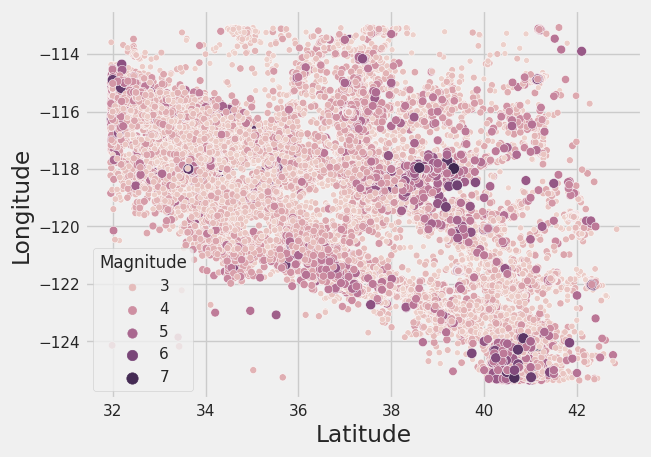

In [10]:
# sns.scatterplot(data=earthquakes, x="Latitude", y="Longitude", hue= "Magnitude", size="Magnitude", ax=ca_map)
ax = sns.scatterplot(data=earthquakes, x="Latitude", y="Longitude", hue= "Magnitude", size="Magnitude")
plt.savefig('scatterplot.png')

In [11]:
from PIL import Image

In [12]:
earthquakes.head()

,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,NST,Azimuthal Gap,DistMin,RMS,...,Updated,Place,Type,Horizontal Error,Depth Error,Magnitude Error,Magnitude Nst,Status,Location Source,Magnitude Source
0,2023-03-20T16:09:39.810Z,37.286333,-121.656667,6.45,2.97,md,124.0,31.0,0.03029,0.09,...,2023-03-21T06:53:37.432Z,"16km E of Seven Trees, CA",earthquake,0.08,0.19,0.146,175.0,reviewed,nc,nc
1,2023-03-20T07:28:45.790Z,34.844833,-116.330833,4.04,2.59,ml,24.0,72.0,0.01577,0.15,...,2023-03-21T07:33:36.862Z,"21km NW of Ludlow, CA",earthquake,0.20,0.35,0.176,25.0,reviewed,ci,ci
2,2023-03-19T11:19:50.860Z,38.519165,-119.492996,5.36,2.82,md,23.0,134.0,0.17480,0.18,...,2023-03-20T16:11:54.434Z,"1km WNW of Walker, CA",earthquake,0.53,2.59,0.280,15.0,automatic,nc,nc
3,2023-03-19T09:53:33.190Z,35.517500,-118.390500,6.66,2.72,ml,56.0,22.0,0.16020,0.15,...,2023-03-20T18:14:55.860Z,"12km SE of Bodfish, CA",earthquake,0.12,0.61,0.258,25.0,reviewed,ci,ci
4,2023-03-18T21:23:56.290Z,40.482833,-124.820333,19.76,2.56,md,42.0,236.0,0.36840,0.16,...,2023-03-20T23:53:17.577Z,"48km WSW of Ferndale, CA",earthquake,0.92,1.07,0.365,33.0,reviewed,nc,nc


In [13]:
earthquakes.insert(0, 'Year', earthquakes['Time'].apply(lambda x: x[:4]).astype('int'))

In [14]:
earthquakes.head()

,Year,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,NST,Azimuthal Gap,DistMin,...,Updated,Place,Type,Horizontal Error,Depth Error,Magnitude Error,Magnitude Nst,Status,Location Source,Magnitude Source
0,2023,2023-03-20T16:09:39.810Z,37.286333,-121.656667,6.45,2.97,md,124.0,31.0,0.03029,...,2023-03-21T06:53:37.432Z,"16km E of Seven Trees, CA",earthquake,0.08,0.19,0.146,175.0,reviewed,nc,nc
1,2023,2023-03-20T07:28:45.790Z,34.844833,-116.330833,4.04,2.59,ml,24.0,72.0,0.01577,...,2023-03-21T07:33:36.862Z,"21km NW of Ludlow, CA",earthquake,0.20,0.35,0.176,25.0,reviewed,ci,ci
2,2023,2023-03-19T11:19:50.860Z,38.519165,-119.492996,5.36,2.82,md,23.0,134.0,0.17480,...,2023-03-20T16:11:54.434Z,"1km WNW of Walker, CA",earthquake,0.53,2.59,0.280,15.0,automatic,nc,nc
3,2023,2023-03-19T09:53:33.190Z,35.517500,-118.390500,6.66,2.72,ml,56.0,22.0,0.16020,...,2023-03-20T18:14:55.860Z,"12km SE of Bodfish, CA",earthquake,0.12,0.61,0.258,25.0,reviewed,ci,ci
4,2023,2023-03-18T21:23:56.290Z,40.482833,-124.820333,19.76,2.56,md,42.0,236.0,0.36840,...,2023-03-20T23:53:17.577Z,"48km WSW of Ferndale, CA",earthquake,0.92,1.07,0.365,33.0,reviewed,nc,nc


In [15]:
earthquakes.sort_values('Year', axis=0, ascending=True, ignore_index=True)['Year'][0]

1932

In [16]:
post1960 = earthquakes[earthquakes['Year'] >= 1960]
post1960.shape #Still too big!

(101880, 23)

In [17]:
post1980 = earthquakes[earthquakes['Year'] >= 1980]
post1980.shape #Still too big!

(85493, 23)

In [18]:
major_earthquakes = earthquakes[earthquakes['Magnitude'] >= 6.0]
# major_per_year = major_earthquakes.groupby('Year').agg('count')
per_year = major_earthquakes.groupby('Year').size().reset_index(name='Count') 
major_per_year = pd.merge(major_earthquakes, per_year, on='Year').sort_values('Year', axis=0, ascending=True)
major_per_year

,Year,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,NST,Azimuthal Gap,DistMin,...,Place,Type,Horizontal Error,Depth Error,Magnitude Error,Magnitude Nst,Status,Location Source,Magnitude Source,Count
80,1932,1932-06-06T08:44:26.300Z,40.729000,-124.287000,15.00,6.45,mw,NaN,NaN,NaN,...,"6 km W of Fields Landing, California",earthquake,NaN,7.70,0.200,NaN,reviewed,iscgem,iscgem,2
79,1932,1932-12-21T06:10:10.700Z,38.604000,-117.952000,10.00,6.80,mw,NaN,NaN,NaN,...,"27 km NNE of Mina, Nevada",earthquake,NaN,5.00,0.300,NaN,reviewed,iscgem,iscgem,2
77,1933,1933-06-25T20:45:28.990Z,39.177000,-119.320000,15.00,6.08,mw,NaN,NaN,NaN,...,"22 km SSE of Stagecoach, Nevada",earthquake,NaN,2.90,0.200,NaN,reviewed,iscgem,iscgem,2
78,1933,1933-03-11T01:54:09.340Z,33.630833,-117.999500,6.00,6.40,mw,7.0,161.00,0.53570,...,"Long Beach, California Earthquake",earthquake,1.41,31.61,NaN,0.0,reviewed,ci,ci,2
75,1934,1934-12-30T13:52:02.690Z,32.000000,-114.900000,6.00,6.33,ml,6.0,322.00,2.16900,...,"24km SSE of Estacion Coahuila, B.C., MX",earthquake,99.00,31.61,0.032,7.0,reviewed,ci,ci,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019,2019-07-06T03:19:53.040Z,35.769500,-117.599333,8.00,7.10,mw,77.0,43.00,0.04616,...,"18km W of Searles Valley, CA",earthquake,0.19,31.61,0.028,126.0,reviewed,ci,ci,2
3,2020,2020-05-15T11:03:27.176Z,38.168900,-117.849700,2.70,6.50,ml,27.0,55.79,0.35700,...,"Monte Cristo Range, NV Earthquake",earthquake,NaN,2.10,NaN,NaN,reviewed,nn,nn,1
2,2021,2021-07-08T22:49:48.110Z,38.507500,-119.499833,7.45,6.00,mw,42.0,100.00,0.04846,...,"Antelope Valley, CA",earthquake,0.14,0.25,NaN,0.0,reviewed,nc,nc,2
1,2021,2021-12-20T20:10:31.310Z,40.390167,-124.298000,27.04,6.20,mw,33.0,170.00,0.06557,...,"7km N of Petrolia, CA",earthquake,0.46,0.34,NaN,0.0,reviewed,nc,nc,2


<function matplotlib.pyplot.show(close=None, block=None)>

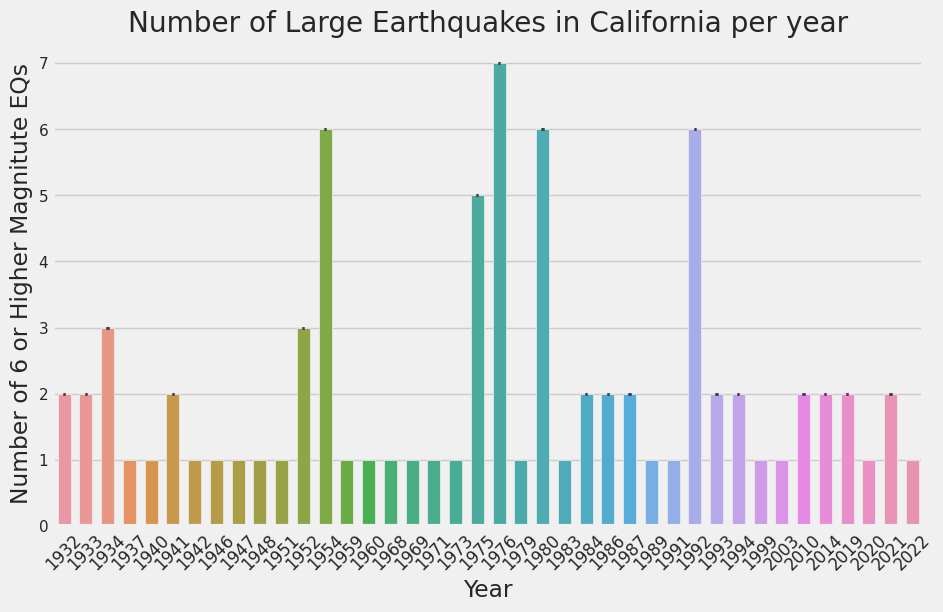

In [19]:
# GRAPH The major_per_year df to see places that have had lots of large earthquakes, do timeseries too.
plt.figure(figsize=(10, 6))
sns.barplot(x=major_per_year['Year'], y=major_per_year['Count'], errwidth=2, capsize=0.1, width=0.6)
# sns.lineplot(x=major_per_year['Year'], y=major_per_year['Count'])
plt.xticks(rotation=45)
# sns.set(rc={'figure.autolayout': True})
plt.xticks(fontsize=12)
plt.ylabel('Number of 6 or Higher Magnitute EQs')
plt.title('Number of Large Earthquakes in California per year')
plt.show

In [20]:
avgNumMajorPerYear = np.mean(major_per_year['Count'])
print('The average number of High Magnitude Earthquakes in one year in '+ str(avgNumMajorPerYear)+ ' from 1932 to 2022.')

The average number of High Magnitude Earthquakes in one year in 3.3209876543209877 from 1932 to 2022.


<AxesSubplot: xlabel='Depth', ylabel='Magnitude'>

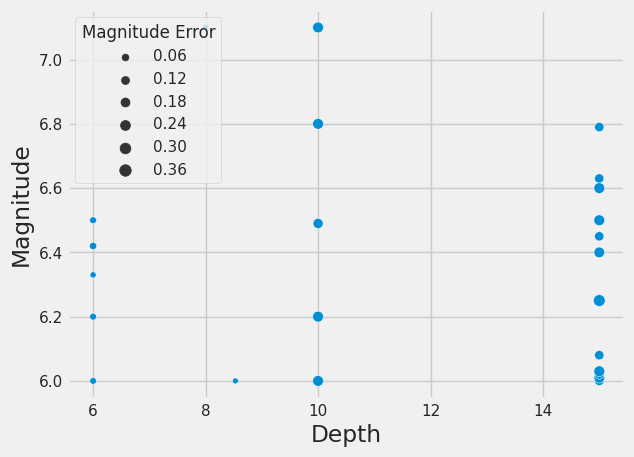

In [21]:
sns.scatterplot(data=major_earthquakes, x="Depth", y="Magnitude", size="Magnitude Error")

Not super useful, but it shows that higher depts tend to have higher magnitude errors.

In [22]:
earthquakes.sample(n=10, replace=True)

,Year,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,NST,Azimuthal Gap,DistMin,...,Updated,Place,Type,Horizontal Error,Depth Error,Magnitude Error,Magnitude Nst,Status,Location Source,Magnitude Source
7778,2019,2019-07-06T09:38:34.470Z,35.674000,-117.467833,8.820,2.76,ml,46.0,42.0,0.087430,...,2021-10-19T18:28:45.811Z,"12km SSW of Searles Valley, CA",earthquake,0.16,0.39,0.235,11.0,reviewed,ci,ci
96101,1974,1974-03-31T09:29:07.230Z,36.519833,-121.081500,8.801,2.64,md,13.0,92.0,0.010810,...,2016-12-14T18:59:04.074Z,"24 km ENE of Soledad, California",earthquake,0.35,0.85,0.080,4.0,reviewed,nc,nc
27246,2007,2007-03-02T09:28:30.830Z,38.776667,-122.722833,2.686,3.05,ml,37.0,47.0,0.005405,...,2017-01-16T06:29:31.900Z,"5 km S of Cobb, California",earthquake,0.24,0.73,0.135,7.0,reviewed,nc,nc
78333,1983,1983-01-08T10:59:48.680Z,37.669833,-118.835000,3.599,2.60,ml,11.0,229.0,NaN,...,2016-04-02T09:09:03.276Z,"13km ENE of Mammoth Lakes, CA",earthquake,8.07,31.61,0.199,4.0,reviewed,ci,ci
84647,1980,1980-05-25T23:40:35.650Z,37.670833,-118.140500,6.000,2.85,ml,4.0,339.0,1.230000,...,2016-04-02T04:23:00.728Z,"40km NE of Dixon Lane-Meadow Creek, CA",earthquake,10.06,31.61,0.421,4.0,reviewed,ci,ci
9350,2019,2019-02-04T02:01:28.470Z,37.635833,-118.811500,3.120,3.00,md,30.0,54.0,0.019470,...,2019-04-18T19:09:36.040Z,"14km NW of Toms Place, CA",earthquake,0.26,0.32,0.186,41.0,reviewed,nc,nc
24998,2008,2008-10-30T06:49:38.370Z,33.064167,-115.910000,2.044,3.30,ml,70.0,38.0,0.090140,...,2016-03-09T07:19:22.818Z,"22km ESE of Ocotillo Wells, CA",earthquake,0.24,0.67,0.181,198.0,reviewed,ci,ci
107693,1943,1943-06-25T07:16:57.650Z,32.970000,-115.670667,6.000,3.10,ml,3.0,319.0,1.071000,...,2016-01-28T01:27:34.220Z,"9km SSW of Westmorland, CA",earthquake,3.73,31.61,0.109,8.0,reviewed,ci,ci
95721,1974,1974-07-14T20:09:45.280Z,36.685667,-121.280500,4.453,2.77,md,24.0,46.0,0.019820,...,2016-12-14T20:19:55.519Z,"12 km SSE of Tres Pinos, California",earthquake,0.21,0.53,0.530,7.0,reviewed,nc,nc
79831,1982,1982-05-19T11:34:05.920Z,35.768000,-117.732000,3.227,2.63,mc,0.0,47.4,NaN,...,2016-02-02T20:55:26.570Z,"15km NNE of Inyokern, CA",earthquake,NaN,0.76,NaN,28.0,reviewed,ci,ci


Columns that were not used did not have null values dropped, as the other information in those rows might be useful in the future.

In [23]:
# Shows us points where there have 
# been major earthquates (6.0 magnitude or more)
county_map = folium.Map(width=500, height=500, 
location=[37.5, -119], zoom_start=5.5)

# Define the colormap to use
colormap = {
    6: 'red',
    7: 'orange',
    8: 'yellow',
    9: 'white',
    10: 'gray'
}

for (index, row) in earthquakes.iterrows():
   # Determine the fill color based on the magnitude
   magnitude = row.loc['Magnitude']
   fill_color = colormap.get(magnitude, 'blue')
   
   # Add a circle marker to the map
   folium.CircleMarker(location=[row.loc['Latitude'], row.loc['Longitude']], radius=row.loc['Magnitude'],
                       color='blue', fill_color=fill_color).add_to(county_map)

county_map.save(outfile="county_map_earthquakes.html")

In [24]:
# Doing the same thing but jsut for impactful Earthquakes (4.5 and up)
impactful_earthquakes = earthquakes[earthquakes['Magnitude'] >= 4]


# Shows us points where there have been major earthquates (6.0 magnitude or more)
county_map = folium.Map(width=500, height=500, location=[37.5, -119], zoom_start=5.5)
# Define the colormap to use
colormap = {
    4: 'yellow',
    5: 'gold',
    6: 'orange',
    7: 'red',
    8: 'magenta',
    9: 'purple',
    10: 'indigo'
}

for (index, row) in impactful_earthquakes.iterrows():
   # Determine the fill color based on the magnitude
   magnitude = row.loc['Magnitude']
   fill_color = colormap.get(magnitude)
   
   # Add a circle marker to the map
   folium.CircleMarker(location=[row.loc['Latitude'], row.loc['Longitude']], radius=row.loc['Magnitude']**2,
                       color=fill_color, fill_color=fill_color).add_to(county_map)

county_map.save(outfile="impactful_earthquakes_map.html")

In [25]:
# Doing the same thing but jsut for all Earthquakes (4.5 and up)
# impactful_earthquakes = earthquakes[earthquakes['Magnitude'] >= 4.5]


# Shows us points where there have been major earthquates (6.0 magnitude or more)
county_map = folium.Map(width=500, height=500, location=[37.5, -119], zoom_start=5.5)
# Define the colormap to use
colormap = {
    4: 'navy',
    5: 'purple',
    6: 'red',
    7: 'orange',
    8: 'yellow',
    9: 'white',
    10: 'gray'
}

for (index, row) in earthquakes.iterrows():
   # Determine the fill color based on the magnitude
   magnitude = row.loc['Magnitude']
   fill_color = colormap.get(magnitude, 'blue')
   
   # Add a circle marker to the map
   folium.CircleMarker(location=[row.loc['Latitude'], row.loc['Longitude']], radius=7,
                       color='blue', fill_color=fill_color).add_to(county_map)

county_map.save(outfile="all_earthquakes_map.html")

In [26]:
import folium

# Define the center of the map
center = [37.7749, -120.4194]

# Create a map object using the center coordinates
m = folium.Map(location=center, zoom_start=12)

# Define the heatmap data (in this case, random points)
heatmap_data = impactful_earthquakes[["Latitude", "Longitude"]]

# Add the heatmap layer to the map
m.add_child(folium.plugins.HeatMap(heatmap_data))

# Display the map
m

In [30]:
impactful_earthquakes.to_csv('Earthquarkes_Over_4mag.csv')
earthquakes.to_csv('All_Earthquakes.csv')
major_earthquakes.to_csv('Earthquarkes_Over_6mag.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6062e091-af91-4518-84bb-d2aa585f2b30' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>